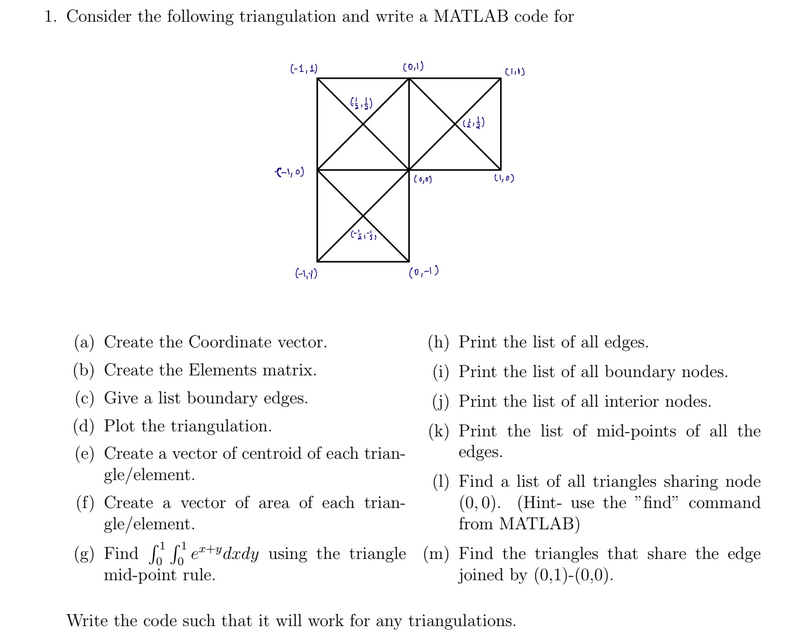

In [14]:
using PyPlot, LinearAlgebra

Centroid of element 1 is [-0.5, -0.8333333333333334]
Centroid of element 2 is [-0.16666666666666666, -0.5]
Centroid of element 3 is [-0.5, -0.16666666666666666]
Centroid of element 4 is [-0.8333333333333334, -0.5]
Centroid of element 5 is [-0.5, 0.16666666666666666]
Centroid of element 6 is [-0.16666666666666666, 0.5]
Centroid of element 7 is [-0.5, 0.8333333333333334]
Centroid of element 8 is [-0.8333333333333334, 0.5]
Centroid of element 9 is [0.5, 0.16666666666666666]
Centroid of element 10 is [0.8333333333333334, 0.5]
Centroid of element 11 is [0.5, 0.8333333333333334]
Centroid of element 12 is [0.16666666666666666, 0.5]

Total area using mid-point rule: 4.315279964273026
Exact area: 4.439

List of all edges:
[1 2; 2 9; 9 1]
[2 3; 3 9; 9 2]
[3 8; 8 9; 9 3]
[8 1; 1 9; 9 8]
[8 3; 3 10; 10 8]
[3 6; 6 10; 10 3]
[6 7; 7 10; 10 6]
[7 8; 8 10; 10 7]
[3 4; 4 11; 11 3]
[4 5; 5 11; 11 4]
[5 6; 6 11; 11 5]
[6 3; 3 11; 11 6]
List of all boundary nodes: [1, 2, 3, 4, 5, 6, 7, 8]
List of all inte

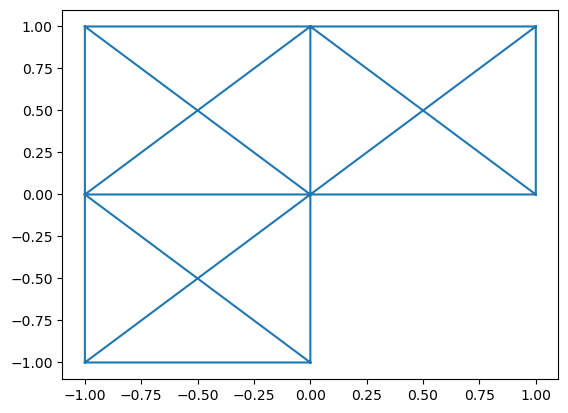

In [50]:
# for L-shaped domain
coord = [-1 -1; 0 -1;
            0 0; 1 0; 
            1 1; 0 1;
          -1 1; -1 0;
           -0.5 -0.5; 
            -0.5 0.5; 
             0.5 0.5]

Elem = [1 2 9; 2 3 9;
        3 8 9; 8 1 9; 
        8 3 10; 3 6 10; 
        6 7 10; 7 8 10;
        3 4 11; 4 5 11;
        5 6 11; 6 3 11]

DB = [1 2; 2 3;
      3 4; 4 5; 
      5 6; 6 7; 
      7 8; 8 1]

# since triplot takes 0-based indexing
triangles = Elem .- 1
plt.triplot(coord[:, 1], coord[:, 2], triangles)

function f(cen)
    return exp(cen[1] + cen[2])
end

area_total = 0.0
for i in 1:size(Elem, 1)
    
    # area of the triangle
    coordTi = coord[Elem[i, :], :]
    det_ = [1 1 1; transpose(coordTi)]
    area_elem = 0.5*det(det_)
    a1 = sum(coordTi[:, 1])
    b1 = sum(coordTi[:, 2])
    
    # Centroid of each triangle
    centroid = [a1/3, b1/3]
    println("Centroid of element $i is $centroid")
    global area_total += area_elem*f(centroid)
end

println("\nTotal area using mid-point rule: $area_total")
println("Exact area: 4.439\n")

println("List of all edges:")
for i in 1:size(Elem, 1)
    println("[$(Elem[i, 1]) $(Elem[i, 2]); \
              $(Elem[i, 2]) $(Elem[i, 3]); \
              $(Elem[i, 3]) $(Elem[i, 1])]")
end

println("List of all boundary nodes: ", unique(DB))
println("List of all interior nodes: ", setdiff(1:size(coord, 1), unique(DB)))

for i in 